In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("C:\\Users\\SS\\Downloads\\MDS Course files\\Data set\\sales-cars.csv")

In [3]:
df.head()

,Month,Sales
0,2016-01,266
1,2016-02,146
2,2016-03,183
3,2016-04,119
4,2016-05,180


In [4]:
df.shape

(36, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
Month    36 non-null object
Sales    36 non-null int64
dtypes: int64(1), object(1)
memory usage: 656.0+ bytes


In [6]:
df['Month']=pd.to_datetime(df['Month']) # To change type of Month feature from object to datetime

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
Month    36 non-null datetime64[ns]
Sales    36 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 656.0 bytes


In [8]:
df1=df.set_index("Month")   # To make month column as index of dataframe

In [9]:
df1.head()

,Sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180


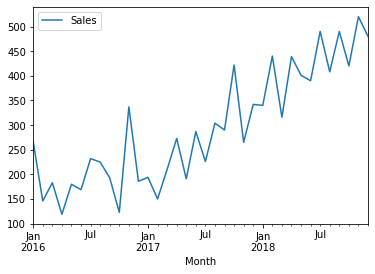

In [10]:
df1.plot() # To plot the df1 data which has only one column that is sales
plt.show()

In [11]:
from statsmodels.graphics.tsaplots import plot_acf  # Importing auto correlation function (acf)

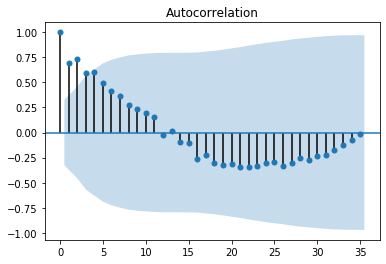

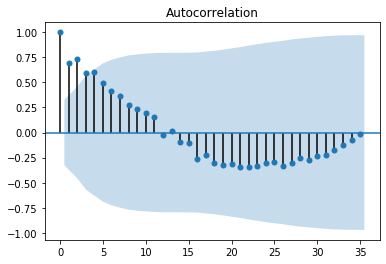

In [12]:
plot_acf(df1,lags=35)

### If it is slowly decaying .. series is not stationary but we need stationary data for time series forecasting

In [13]:
df1.shift(1)  # we will do this to find difference 

,Sales
Month,
2016-01-01,NaN
2016-02-01,266.0
2016-03-01,146.0
2016-04-01,183.0
2016-05-01,119.0
2016-06-01,180.0
2016-07-01,169.0
2016-08-01,232.0
2016-09-01,225.0


### integrated of order 1, denoted by d(diff.) , one of the parameter of ARIMA model

In [14]:
df1_diff=df1.diff(periods = 1)

In [15]:
df1_diff.head()

,Sales
Month,
2016-01-01,NaN
2016-02-01,-120.0
2016-03-01,37.0
2016-04-01,-64.0
2016-05-01,61.0


In [16]:
# droping first row as in sales column it only contrain NaN value
df1_diff = df1_diff[1:]

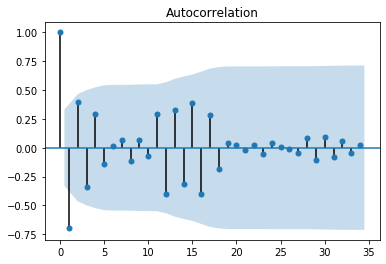

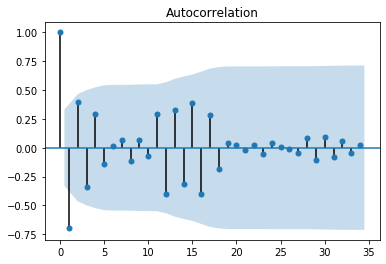

In [17]:
# Again plotting Auto Corellation plot
plot_acf(df1_diff,lags=34)

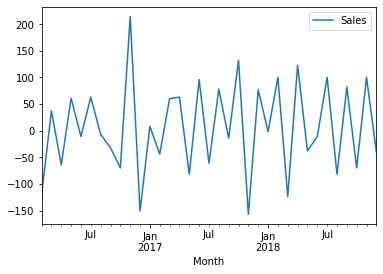

In [18]:
df1_diff.plot()
plt.show()

## Now Data become stationary. We apply AR Model

In [19]:
# Train & Test Data split
x=df1.values
train=x[:27]
test=x[27:]

In [20]:
from statsmodels.tsa.ar_model import AR

In [21]:
model=AR(train)
model_fit=model.fit()

In [22]:
pred = model_fit.predict(start=27,end=36)
pred

array([398.22922886, 368.27242294, 429.47485941, 379.17750391,
       431.35262347, 399.90234723, 433.3589338 , 418.74469463,
       453.45711544, 429.65174489])

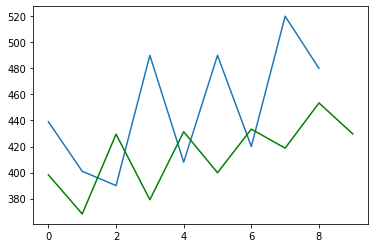

In [23]:
plt.plot(test)
plt.plot(pred,color='g')

# ARIMA Model
(p,d,q)

p = periods taken for auto regressive model

d = integrated order or diffference

q = periods in moving averag model

In [24]:
from statsmodels.tsa.arima_model import ARIMA

In [25]:
arima_model = ARIMA(train , order = (3,1,1))
arima_model_fit = arima_model.fit()
print(arima_model_fit.aic)

295.9979353418612


In [26]:
arima_pred = arima_model_fit.forecast(steps=9)[0]  # the number of out of sample forecasts from the end of the sample
arima_pred

array([388.10768153, 361.88638003, 431.54609927, 377.90925848,
       418.71352972, 398.84046379, 442.34753967, 420.19652087,
       447.08625411])

In [27]:
prd=arima_pred[0]

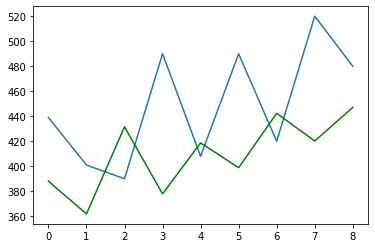

In [28]:
plt.plot(test)
plt.plot(arima_pred,color='g')

## Finding perfect p , d , q  as they are main parameter of ARIMA Model

In [29]:
import itertools
p = d = q = range(5)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [30]:
import warnings
warnings.filterwarnings('ignore')
aic_list=[]

In [31]:
for params in pdq:
    try:
        arima_model=ARIMA(train,order=params)
        arima_model_fit=arima_model.fit()
        aic_list.append((params,arima_model_fit.aic))
        print(params,arima_model_fit.aic)
    except:
        continue

(0, 0, 0) 319.45285852307086
(0, 0, 1) 318.7244809384947
(0, 0, 2) 315.2506002896649
(0, 0, 3) 316.38342265642257
(0, 0, 4) nan
(0, 1, 0) 311.8293983488534
(0, 1, 1) 296.0841530678005
(0, 1, 2) 296.3229226907689
(0, 2, 0) 329.1834958250828
(0, 2, 1) 306.1019469685257
(1, 0, 0) 316.1668717534279
(1, 0, 1) 313.0487174406702
(1, 0, 2) 310.9790642275034
(1, 1, 0) 298.8325442271006
(1, 1, 1) 297.12565112585196
(1, 1, 2) 299.47166670629457
(1, 1, 3) 301.28511809480204
(1, 2, 0) 306.53077675708374
(2, 0, 0) 310.9969573612191
(2, 0, 1) 342.5246358294303
(2, 1, 0) 300.20895612399573
(2, 1, 1) 297.99999301674006
(2, 1, 2) 298.55054281302245
(2, 1, 3) 302.87208388612163
(2, 2, 0) 306.2975856431866
(3, 0, 0) 312.9838587473828
(3, 0, 1) 336.078521041164
(3, 1, 0) 294.85435842186024
(3, 1, 1) 295.9979353418612
(3, 1, 2) 292.66862386939545
(3, 1, 3) 294.6588907518689
(3, 2, 0) 299.40758681554314
(4, 0, 0) 311.0706562039329
(4, 0, 1) 321.8309391983909
(4, 1, 0) 295.93436313519135
(4, 1, 1) 297.9098817

In [32]:
aic_list[:10]

[((0, 0, 0), 319.45285852307086),
 ((0, 0, 1), 318.7244809384947),
 ((0, 0, 2), 315.2506002896649),
 ((0, 0, 3), 316.38342265642257),
 ((0, 0, 4), nan),
 ((0, 1, 0), 311.8293983488534),
 ((0, 1, 1), 296.0841530678005),
 ((0, 1, 2), 296.3229226907689),
 ((0, 2, 0), 329.1834958250828),
 ((0, 2, 1), 306.1019469685257)]

In [33]:
# Sorting aic_list
l1 = sorted(aic_list, key = lambda x : x[1] )

In [34]:
l1[0]

((4, 2, 1), 291.39913447175024)

### Again Modelizing using ARIMA Model

In [36]:
from statsmodels.tsa.arima_model import ARIMA 
arima_model = ARIMA(train, order = (4,2,1))
arima_model_fit = arima_model.fit()
print(arima_model_fit.aic)

291.39913447175024


In [37]:
arima_pred = arima_model_fit.forecast(steps = 9)[0]
arima_pred

array([419.8622191 , 399.60378085, 480.05781704, 431.16700923,
       488.8013932 , 488.07665638, 543.45028781, 535.49541695,
       575.01644311])

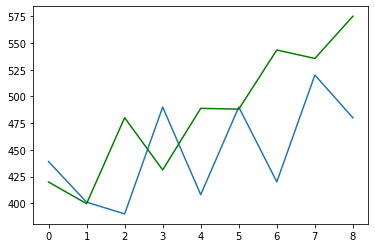

In [38]:
plt.plot(test)
plt.plot(arima_pred, color = 'g')